# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron

# Problem 1a

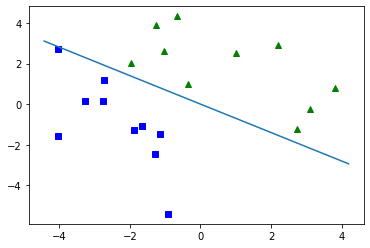

In [30]:
# load data
df = pd.read_csv("20sample_d2.csv", header = None)
X = df.loc[:,0:1] # the columns are unnamed
y = df.loc[:,2]

# plot data points and their labels
plt.plot(X[0][y == 1],X[1][y == 1], 'g^')
plt.plot(X[0][y == -1],X[1][y == -1], 'bs')

# get xlim
axes = plt.gca()
line_x = axes.get_xlim()

# plot true target function/decision boundary
w = [0.1860, 0.2654] # w = [0.1860 0.2654]**T
b = 0/w[1]
slope = -w[0]/w[1]
line_y = [slope * i + b for i in line_x]
plt.plot(line_x, line_y)

In [31]:
print("Decision Boundary")
print("Slope:\t\t", slope)
print("Intercept:\t", b)
print("---")
print("Target Function:", w)
print("Bias:\t\t", b)

Decision Boundary
Slope:		 -0.7008289374529012
Intercept:	 0
---
Target Function: [0.186, 0.2654]
Bias:		 0


# Problem 1b

In [32]:
# create Perceptron model
clf = Perceptron(tol=1e-3, random_state=0)

# train model on dataset
clf.fit(X, y)

# coefficient of determination of the prediction
print("Coefficient of Determination of the Prediction:\t", clf.score(X,y))

Coefficient of Determination of the Prediction:	 1.0


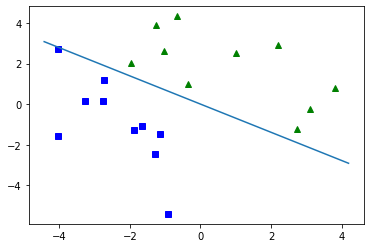

In [33]:
# plot original dataset
plt.plot(X[0][y == 1],X[1][y == 1], 'g^')
plt.plot(X[0][y == -1],X[1][y == -1], 'bs')

# plot generated target function/decision boundary
slope_new = -clf.coef_[0][0] / clf.coef_[0][1]
b_new = clf.intercept_[0] / clf.coef_[0][1]
line_y_new = [slope_new * i + b_new for i in line_x]
plt.plot(line_x, line_y_new)

In [34]:
print("Slope:\t\t\t", slope_new)
print("Intercept:\t\t", b_new)
print("Number of Updates:\t", clf.n_iter_)
print("Target Function:\t", clf.coef_)
print("Bias:\t\t\t", clf.intercept_)

Slope:			 -0.6945447348855619
Number of Updates:	 7
Target Function:	 [[1.2985  1.86957]]
Bias:			 [0.]


# Problem 1c

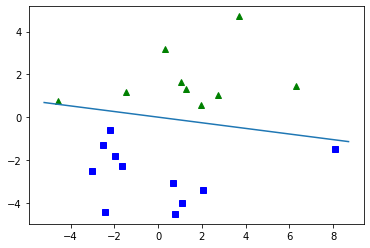

In [35]:
# load data
df = pd.read_csv("2_20sample_d2.csv", header = None)
X = df.loc[:,0:1] # the columns are unnamed
y = df.loc[:,2]

# plot data points and their labels
plt.plot(X[0][y == 1],X[1][y == 1], 'g^')
plt.plot(X[0][y == -1],X[1][y == -1], 'bs')

axes = plt.gca()
line_x = axes.get_xlim()

# plot true target function/decision boundary
w = [0.1245, 0.9486] # w = [0.1245 0.9486]**T
b = 0
slope = -w[0]/w[1]
line_y = [slope * i + b for i in line_x]
plt.plot(line_x, line_y)

In [36]:
print("Decision Boundary")
print("Slope:\t\t", slope)
print("Intercept:\t", b)
print("---")
print("Target Function:", w)
print("Bias:\t\t", b)

Decision Boundary
Slope:		 -0.1312460468058191
Intercept:	 0
---
Target Function: [0.1245, 0.9486]
Bias:		 0


In [43]:
# create Perceptron model
clf = Perceptron(tol=1e-3, random_state=0)

# train model on dataset
clf.fit(X, y)

# coefficient of determination of the prediction
print("Coefficient of Determination of the Prediction:\t", clf.score(X,y))

Coefficient of Determination of the Prediction:	 1.0


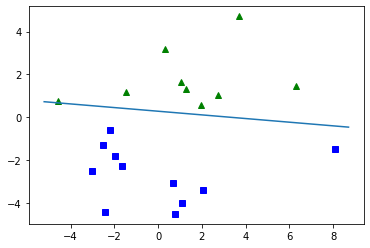

In [50]:
# plot original dataset
plt.plot(X[0][y == 1],X[1][y == 1], 'g^')
plt.plot(X[0][y == -1],X[1][y == -1], 'bs')

# plot generated target function/decision boundary
slope_new = -clf.coef_[0][0] / clf.coef_[0][1]
b_new = clf.intercept_[0] / clf.coef_[0][1]
line_y_new = [slope_new * i + b_new for i in line_x]
plt.plot(line_x, line_y_new)

In [53]:
print("Slope:\t\t\t", slope_new)
print("Intercept:\t\t", b_new)
print("Number of Updates:\t", clf.n_iter_)
print("Target Function:\t", clf.coef_)
print("Bias:\t\t\t", clf.intercept_)

Slope:			 -0.08537160839102789
Intercept:		 0.2767671931239959
Number of Updates:	 9
Target Function:	 [[0.61692 7.22629]]
Bias:			 [2.]


# Problem 1d

(-332.17199999999997, 303.67199999999997)

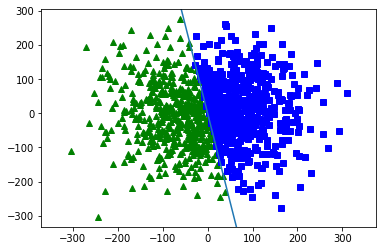

In [54]:
# load data
df = pd.read_csv("1000sample_d2.csv", header = None)
X = df.loc[:,0:1] # the columns are unnamed
y = df.loc[:,2]

# plot data points and their labels
plt.plot(X[0][y == 1],X[1][y == 1], 'g^')
plt.plot(X[0][y == -1],X[1][y == -1], 'bs')

axes = plt.gca()
line_x = axes.get_xlim()
y_lim = axes.get_ylim()

# plot true target function/decision boundary
w = [-0.9469, -0.1828]
b = 0
slope = -w[0]/w[1]
line_y = [slope * i + b for i in line_x]
plt.plot(line_x, line_y)
axes.set_ylim(y_lim)

In [55]:
print("Decision Boundary")
print("Slope:\t\t", slope)
print("Intercept:\t", b)
print("---")
print("Target Function:", w)
print("Bias:\t\t", b)

Decision Boundary
Slope:		 -5.179978118161926
Intercept:	 0
---
Target Function: [-0.9469, -0.1828]
Bias:		 0


In [56]:
# create Perceptron model
clf = Perceptron(tol=1e-3, random_state=0)

# train model on dataset
clf.fit(X, y)

# coefficient of determination of the prediction
print("Coefficient of Determination of the Prediction:\t", clf.score(X,y))

Coefficient of Determination of the Prediction:	 0.99


(-332.17199999999997, 303.67199999999997)

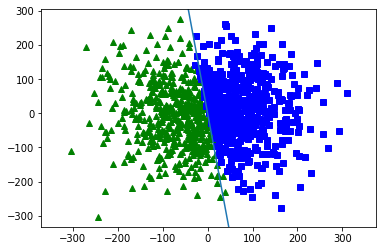

In [59]:
# plot original dataset
plt.plot(X[0][y == 1],X[1][y == 1], 'g^')
plt.plot(X[0][y == -1],X[1][y == -1], 'bs')

axes = plt.gca()

# plot generated target function/decision boundary
slope_new = -clf.coef_[0][0] / clf.coef_[0][1]
b_new = clf.intercept_[0] / clf.coef_[0][1]
line_y_new = [slope_new * i + b_new for i in line_x]
plt.plot(line_x, line_y_new)
axes.set_ylim(y_lim)

In [60]:
print("Slope:\t\t\t", slope_new)
print("Intercept:\t\t", b_new)
print("Number of Updates:\t", clf.n_iter_)
print("Target Function:\t", clf.coef_)
print("Bias:\t\t\t", clf.intercept_)

Slope:			 -7.065073135188623
Intercept:		 -0.02175024197144192
Number of Updates:	 16
Target Function:	 [[-1299.30934  -183.906  ]]
Bias:			 [4.]


# Problem 1e

In [82]:
# load data
df = pd.read_csv("1000sample_d10.csv", header = None)
X = df.loc[:,0:9] # the columns are unnamed
y = df.loc[:,10]

In [87]:
# create Perceptron model
clf = Perceptron(tol=1e-3, random_state=0)

# train model on dataset
clf.fit(X, y)

# coefficient of determination of the prediction
print("Coefficient of Determination of the Prediction:\t", clf.score(X,y))

Coefficient of Determination of the Prediction:	 0.977


In [88]:
print("Number of Updates:\t", clf.n_iter_)
print("Target Function:\t", clf.coef_)
print("Bias:\t\t\t", clf.intercept_)

Number of Updates:	 24
Target Function:	 [[ 25.13692073  29.116954   115.4927033   22.130051   120.040915
  -50.300309   -39.9160587   30.469952     0.4267497   -0.844576  ]]
Bias:			 [3.]


# Problem 1f

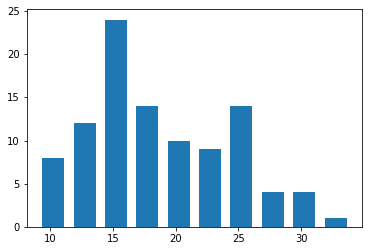

In [81]:
histogram = []
for i in range(100):
    # create Perceptron model
    clf = Perceptron(tol=1e-3, random_state=i)

    # train model on dataset
    clf.fit(X, y)

    histogram.append(clf.n_iter_)

hist, bins = np.histogram(histogram)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
_ = plt.bar(center, hist, align='center', width=width)
plt.show()

# Problem 1g

See report.

In [ ]:
# misc
w = np.array([[0.1860, 0.2654]])
np_df = X.to_numpy()

print(np.shape(w))
print(np.shape(np_df))
print(np_df[0])
res = []
for i in range(len(np_df)):
    res.append(np.matmul(w, np_df[i]))

res = pd.DataFrame(np.array(res)).loc[:,0]
plt.plot(X[0][res >= 0],X[1][res >= 0], 'g^')
plt.plot(X[0][res < 0],X[1][res < 0], 'bs')